## For Only Deeplearning Model

In [4]:
from tensorflow.keras.models import load_model
import numpy as np
from skimage.transform import resize
import imageio

# Load the saved model
model_path = 'resnet/resnet_model.h5'
loaded_model = load_model(model_path)
print("Model loaded successfully.")

# Function to preprocess the new image
def preprocess_image(image_path):
    MAX_WIDTH = 100
    MAX_HEIGHT = 100
    image = imageio.imread(image_path)
    image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
    image = 255 * image
    image = image.astype(np.uint8)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = normalize_it(image)
    return image

# Function to normalize the image
def normalize_it(X):
    v_min = X.min(axis=(1, 2, 3), keepdims=True)
    v_max = X.max(axis=(1, 2, 3), keepdims=True)
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)
    X_normalized = (X - v_min) / range_values
    return X_normalized
    
# List of words corresponding to the class indices
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

# Example usage with a new image
new_image_path = "D:/Lipreading/concatenated_images(5x5)/F01/words/02/07.jpg"  # Replace with the path to your new image
preprocessed_image = preprocess_image(new_image_path)
prediction = loaded_model.predict(preprocessed_image)

# Get the predicted class
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_word = words[predicted_class_index]

print(f"Predicted class: {predicted_class_index}")
print(f"Predicted class word: {predicted_class_word}")


C:\Users\satvi\AppData\Local\Temp\ipykernel_11004\767139900.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
Predicted class: 6
Predicted class word: Start


## For DL+ML Model

In [2]:
import joblib
from tensorflow.keras.models import load_model
import tkinter as tk
from tkinter import filedialog
import os
import time
import imageio
import numpy as np
from skimage.transform import resize

# Define your custom paths
base_model_path = "model_1/resnet_base_model.h5"
pipeline_classifier_path = "model_1/svm_classifier.pkl"

# Function to load the model and classifier
def load_models(model_path=base_model_path, classifier_path=pipeline_classifier_path):
    base_model = load_model(model_path)
    classifier_pipeline = joblib.load(classifier_path)
    return base_model, classifier_pipeline

def predict_class(new_sample, base_model, classifier_pipeline):
    # Preprocess the new sample
    MAX_WIDTH = 100
    MAX_HEIGHT = 100
    new_sample = resize(new_sample, (MAX_WIDTH, MAX_HEIGHT))
    new_sample = 255 * new_sample
    new_sample = new_sample.astype(np.uint8)
    new_sample = np.expand_dims(new_sample, axis=0)  # Add batch dimension
    new_sample = np.expand_dims(new_sample, axis=-1)  # Add channel dimension
    new_sample = normalize_it(new_sample)

    # Extract features using the Base model
    features = base_model.predict(new_sample)

    # Predict class using the Classifier pipeline
    predicted_class = classifier_pipeline.predict(features)
    return predicted_class

def normalize_it(X):
    v_min = X.min(axis=(1, 2, 3), keepdims=True)
    v_max = X.max(axis=(1, 2, 3), keepdims=True)
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)
    X_normalized = (X - v_min) / range_values
    return X_normalized

def select_image_file():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(title="Select an image file",
                                           filetypes=[("Image files", "*.jpg")])
    if file_path:  # If a file is selected
        image_data = imageio.imread(file_path)
        return image_data
    else:
        return None

# Example usage
base_model, classifier_pipeline = load_models()
new_image = select_image_file()
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

if new_image is not None:
    predicted_class_index = predict_class(new_image, base_model, classifier_pipeline)[0]
    predicted_class_word = words[predicted_class_index]
    print(f"The class of the new sample is: '{predicted_class_index}'")
    print(f"Predicted class word: {predicted_class_word}")
else:
    print("No image selected.")


C:\Users\satvi\AppData\Local\Temp\ipykernel_11004\716075136.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_data = imageio.imread(file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
The class of the new sample is: '0'
Predicted class word: Begin


## Graphs

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_data.xlsx' with the path to your Excel file
file_path = 'Book1.xlsx'

# Load the data into a DataFrame
df = pd.read_excel(file_path)

df.head()

,Model Description,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Testing Accuracy,Testing Precision,Testing Recall,Testing F1- score,Area of ROC Curve
0,Resnet-50,10.61,NaN,NaN,NaN,16.67,NaN,NaN,NaN,NaN
1,Inception-V3,10.45,NaN,NaN,NaN,14.67,NaN,NaN,NaN,NaN
2,VGG-16,11.30,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN
3,Mobile Net,9.58,NaN,NaN,NaN,10.00,NaN,NaN,NaN,NaN
4,Resnet-50 + SVM,100.00,100.0,100.0,100.0,44.33,50.09,44.33,40.82,0.82


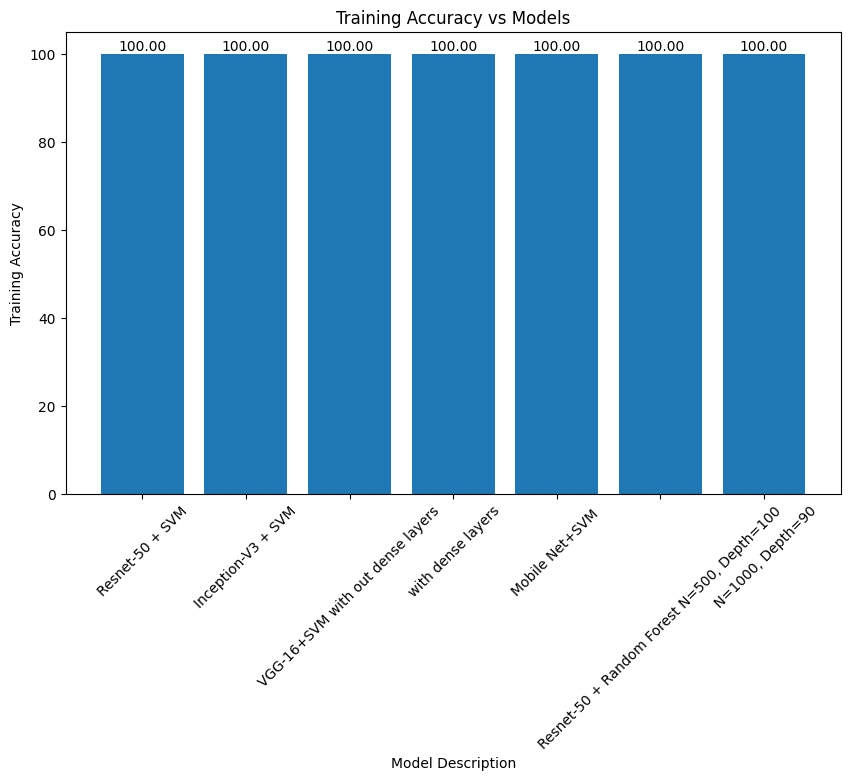

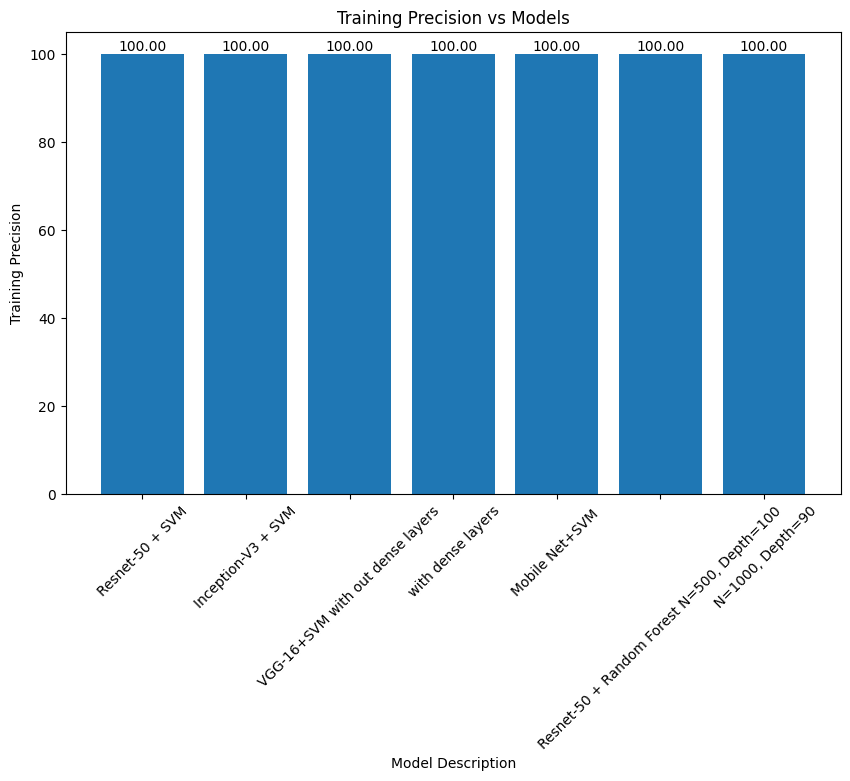

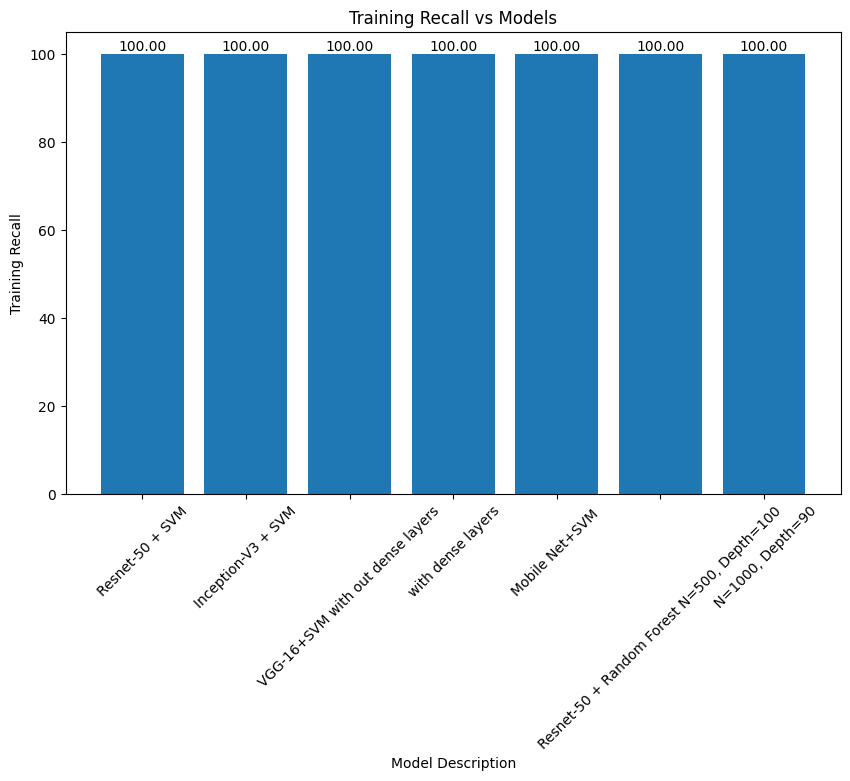

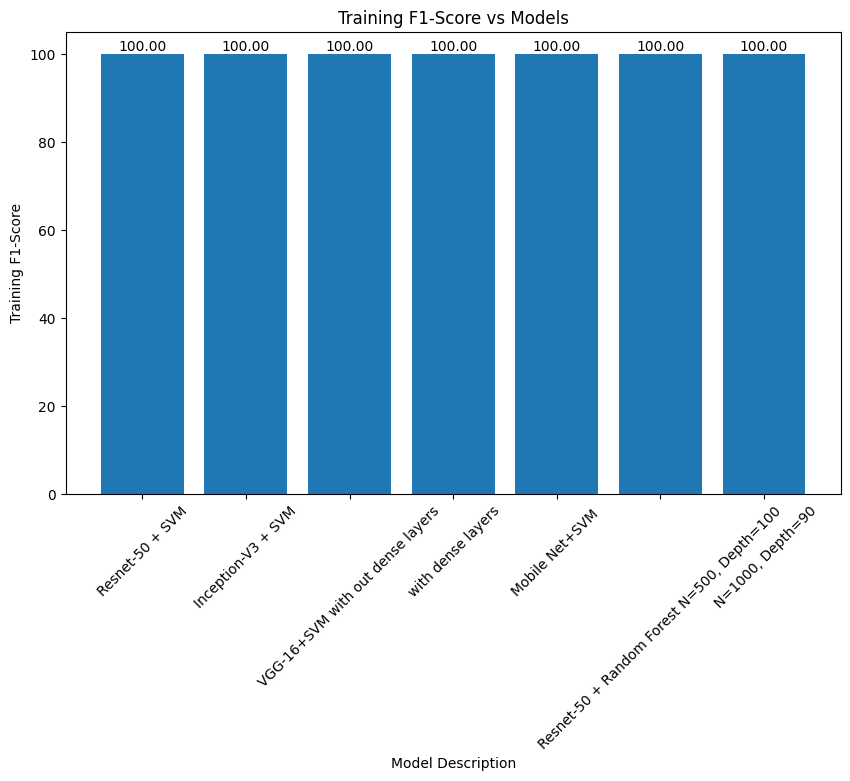

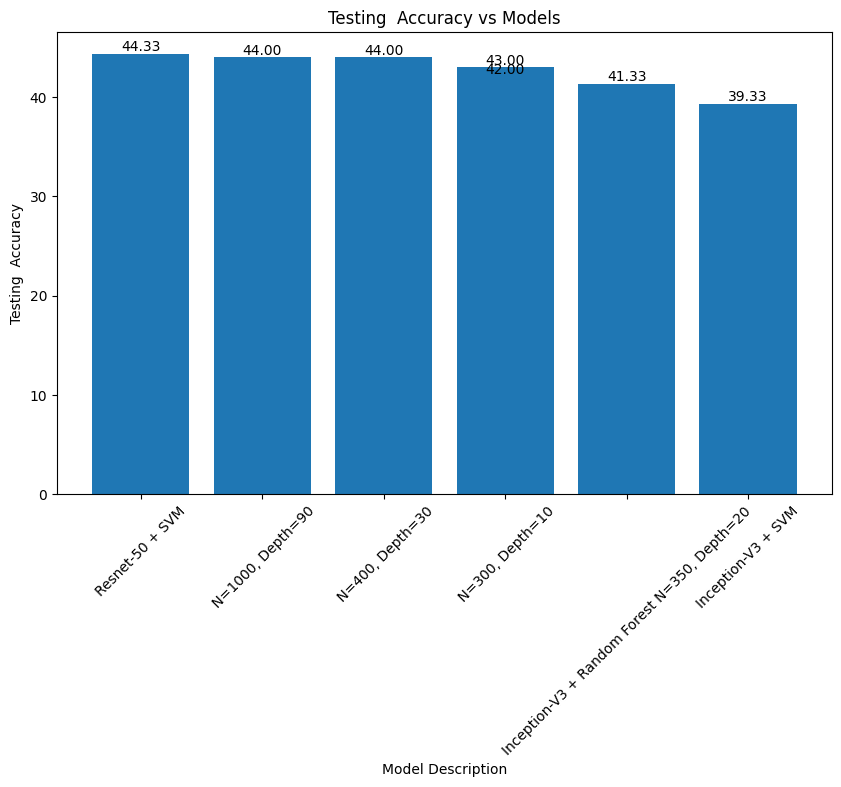

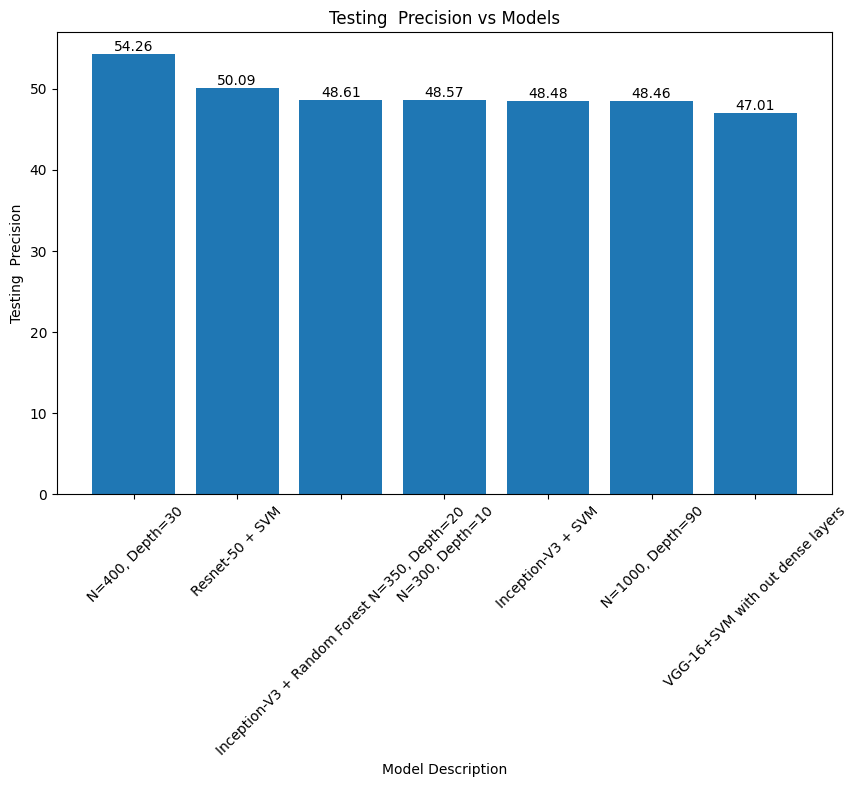

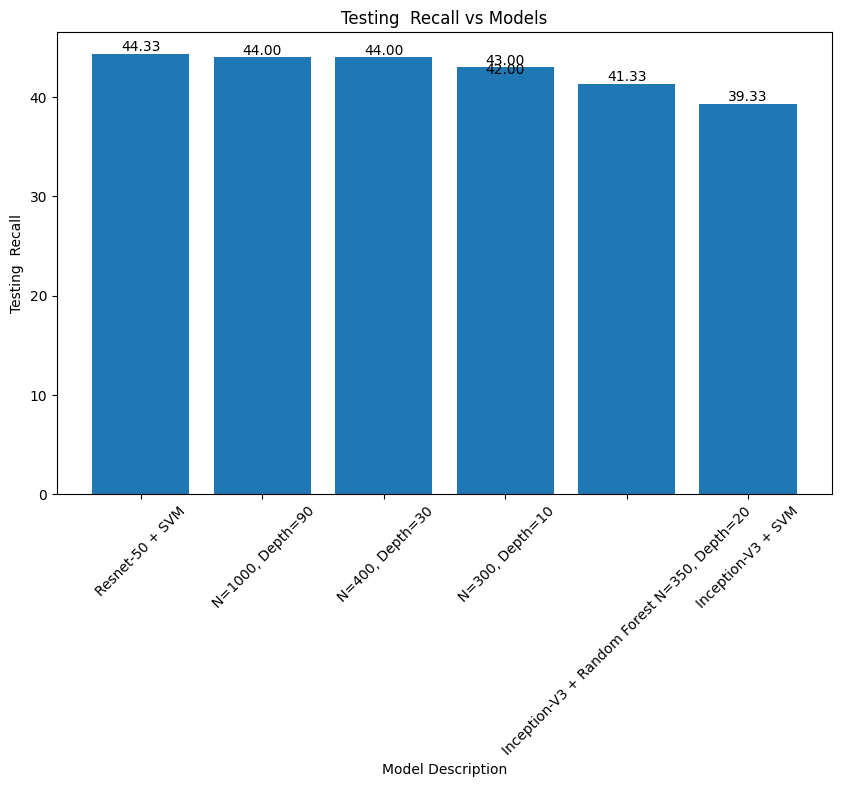

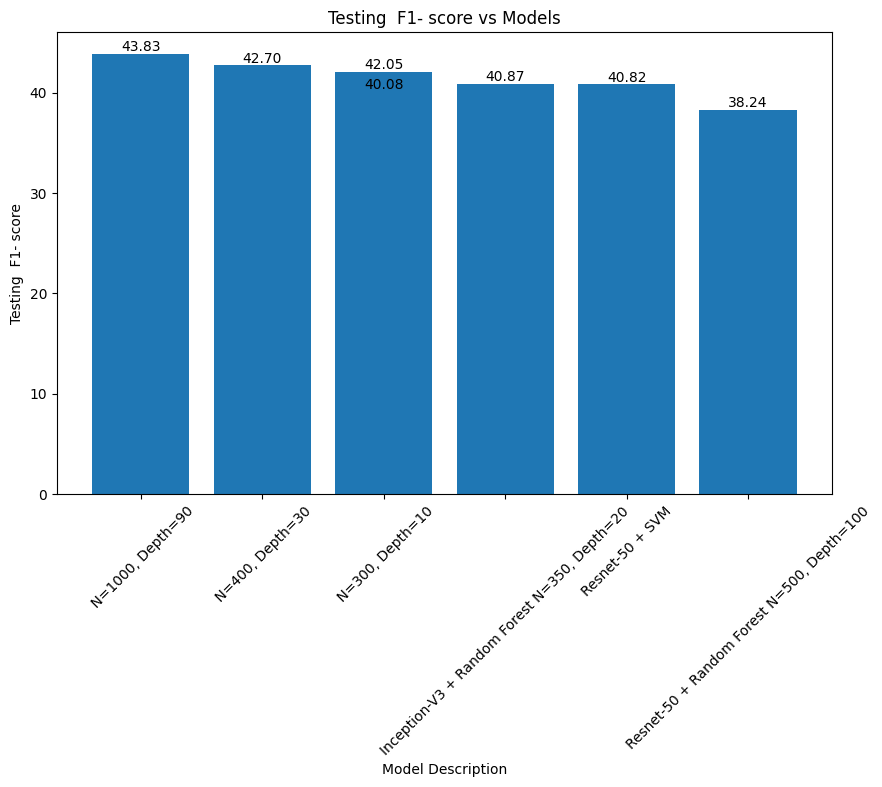

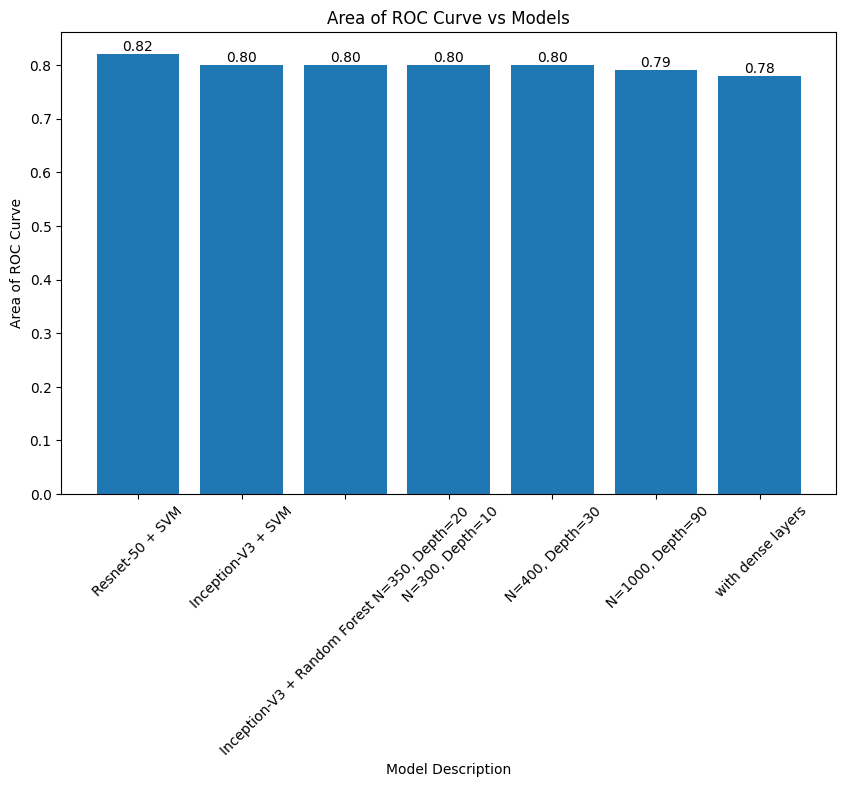

In [11]:
# List of columns to plot
columns_to_plot = df.columns[1:]  # Skip the 'Model Description' column

# Function to create bar graphs for top 5 values
def plot_bar_graph(column):
    # Sort the DataFrame by the specified column and select top 5 rows
    top5_df = df.nlargest(7, column)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top5_df['Model Description'], top5_df[column])
    plt.xlabel('Model Description')
    plt.ylabel(column)
    plt.title(f'{column} vs Models')
    plt.xticks(rotation=45)
    
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.show()

# Plot each column against 'Model Description'
for column in columns_to_plot:
    plot_bar_graph(column)
